In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [36]:

def create_station_coordinates(dataset20_path, cartesian_path):
    df_routes = pd.read_csv(dataset20_path)
    df_coords = pd.read_csv(cartesian_path)
    
    # Create a graph from the routes
    G = nx.from_pandas_edgelist(df_routes, 'From Station', 'To Station', ['Line'])
    
    # Create a mapping between station names and their normalized versions
    station_mapping = {station.lower().replace(' ', ''): station for station in G.nodes()}
    
    # Initialize positions with known coordinates
    pos = {}
    for _, row in df_coords.iterrows():
        normalized_name = row['nodeLabel'].lower().replace(' ', '')
        if normalized_name in station_mapping:
            pos[station_mapping[normalized_name]] = (row['x'], row['y'])
    
    # Use spring layout for unknown stations, keeping known positions fixed
    pos_spring = nx.spring_layout(G, pos=pos, fixed=pos.keys(), k=0.5, iterations=50)
    
    # Normalize positions to 0-100 range
    x_values, y_values = zip(*pos_spring.values())
    x_min, x_max = min(x_values), max(x_values)
    y_min, y_max = min(y_values), max(y_values)
    
    pos_normalized = {node: ((x - x_min) / (x_max - x_min) * 100, 
                             (y - y_min) / (y_max - y_min) * 100) 
                      for node, (x, y) in pos_spring.items()}
    
    return pos_normalized, G

In [37]:
pos, G  = create_station_coordinates('../data/dataset20.csv', 'cartesian.csv')


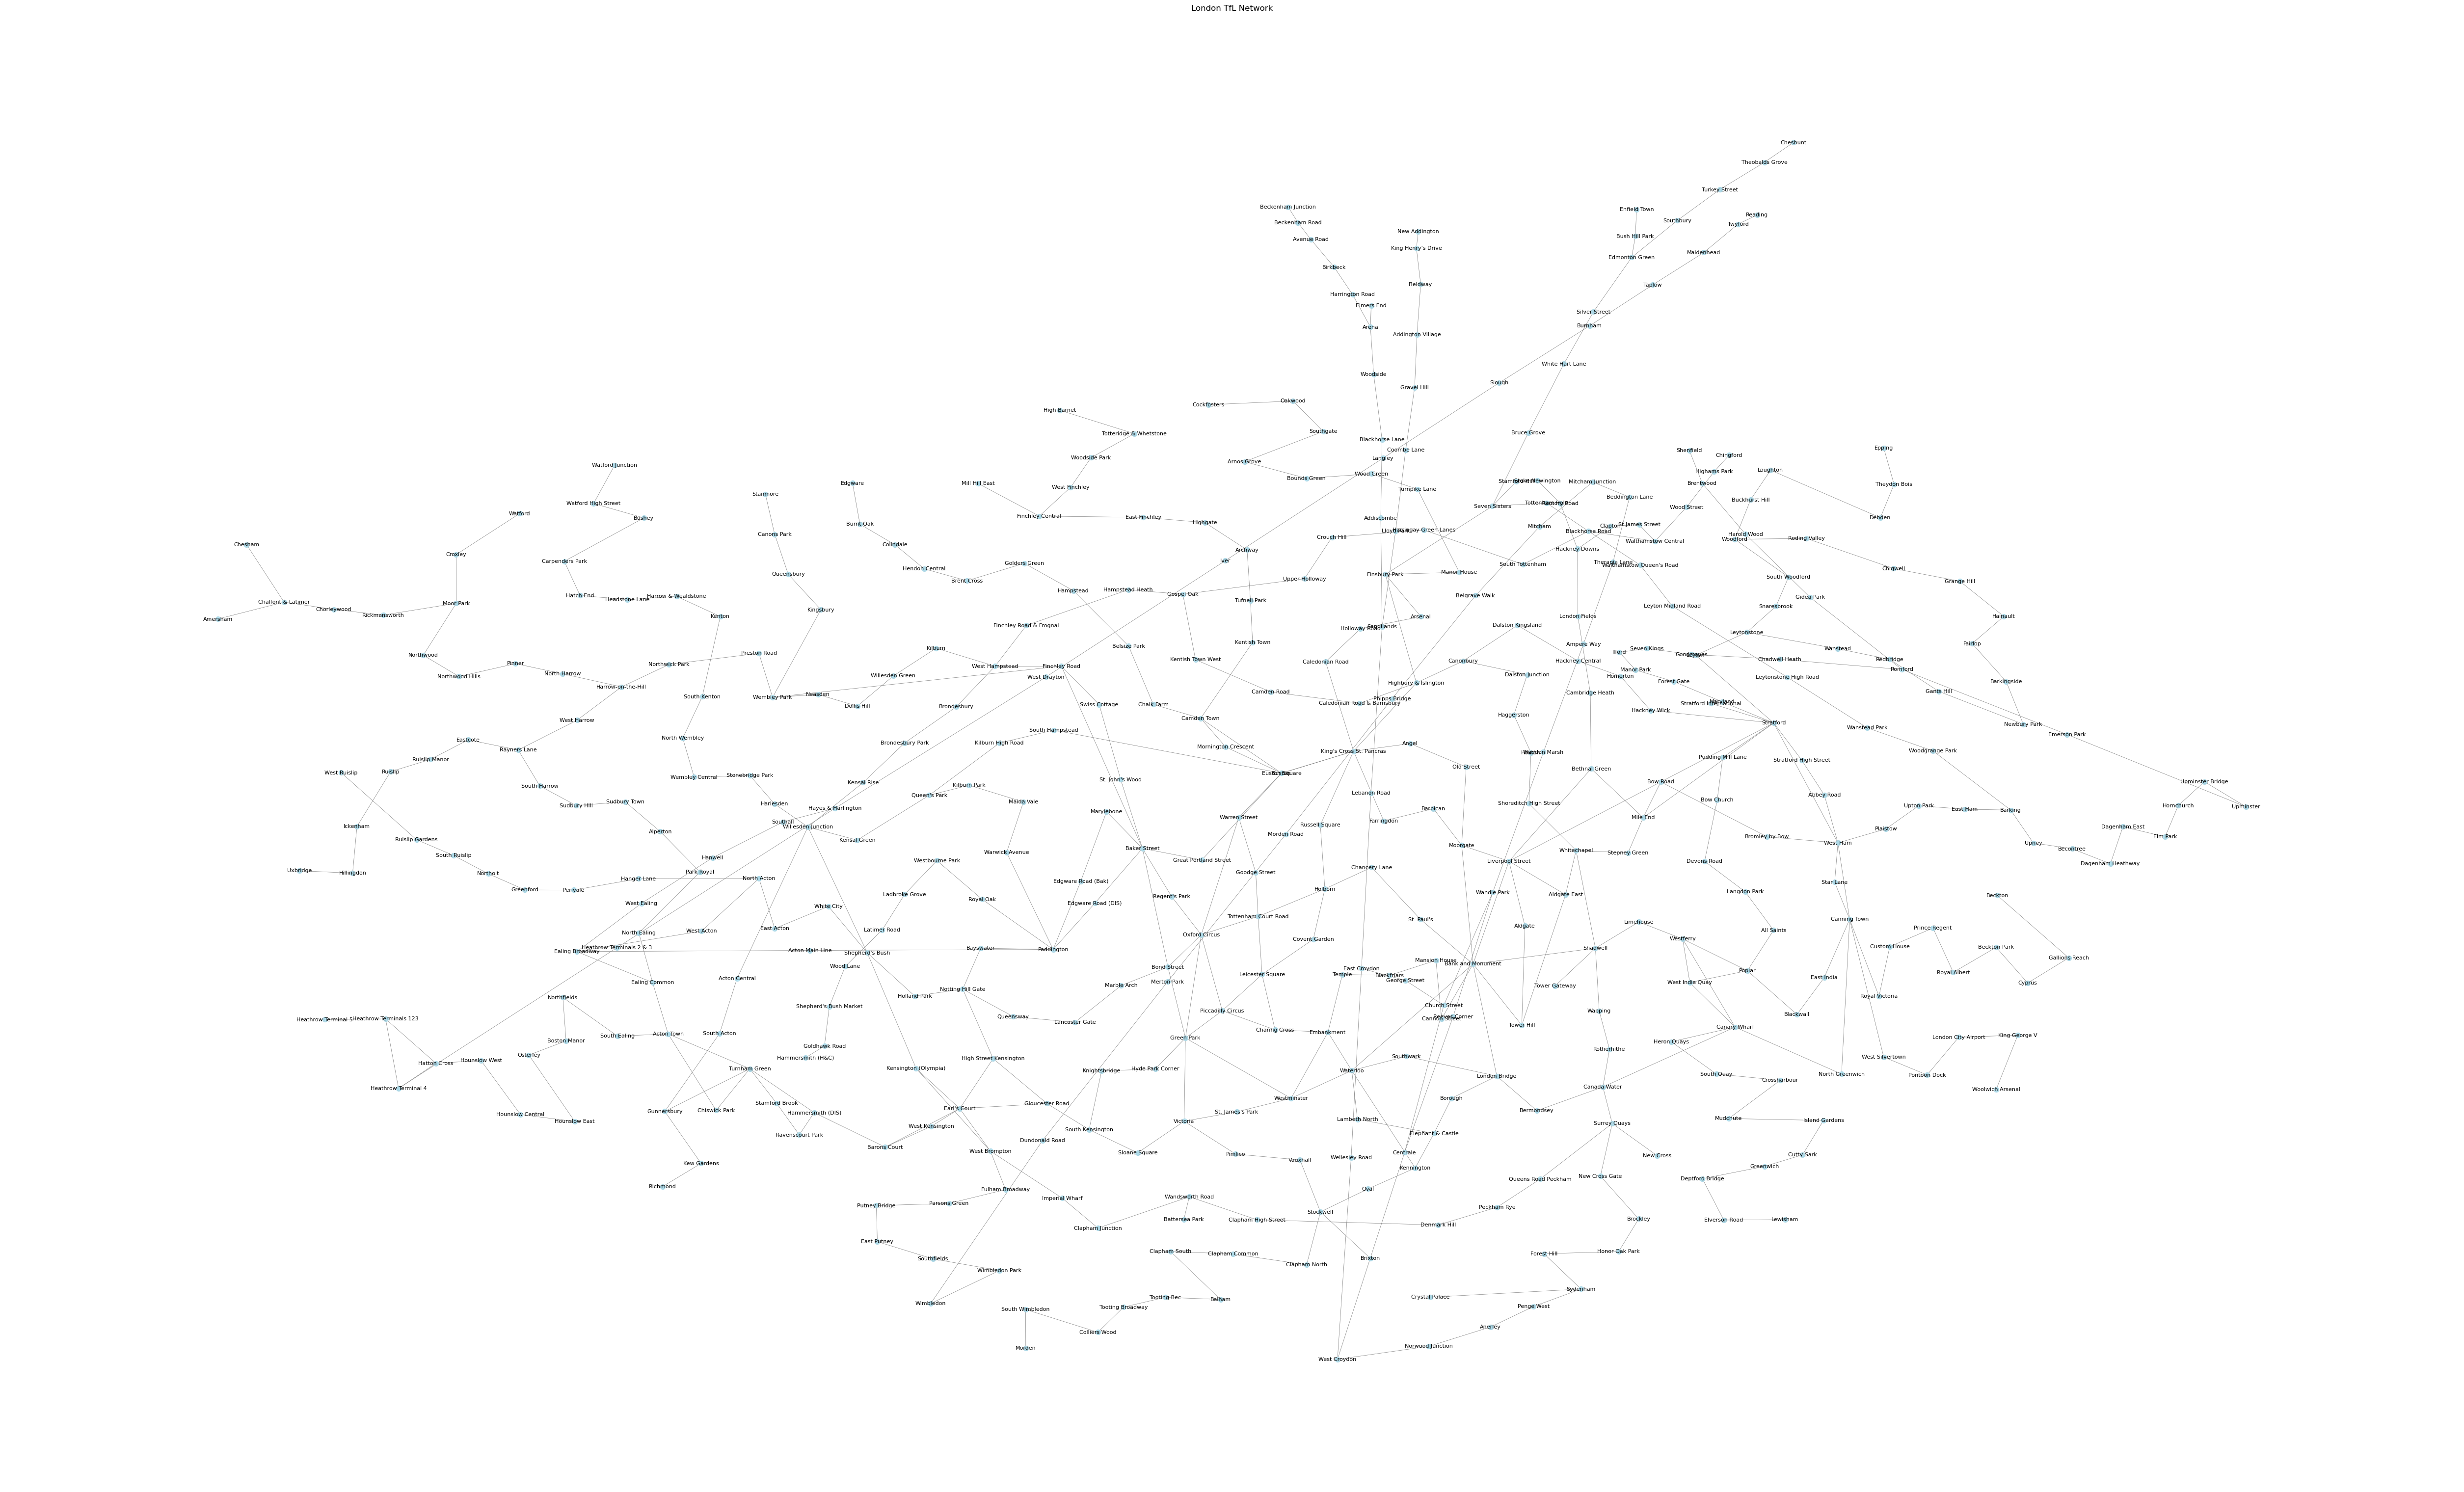

In [38]:
plt.figure(figsize=(50, 30))
nx.draw(G, pos, node_size=50, node_color='lightblue', with_labels=True, font_size=8, edge_color='gray', width=0.5)
plt.title("London TfL Network")
plt.axis('off')
plt.show()


In [31]:
def get_node_color(node, G, color_map):
    lines = set(G[node][neighbor]['Line'] for neighbor in G[node])
    if len(lines) == 1:
        return color_map[list(lines)[0]]
    else:
        # If multiple lines, you could implement a priority system here
        # For now, we'll just take the first line's color
        return color_map[list(lines)[0]]


In [32]:
color_map = {
    'Bakerloo': 'brown',
    'Central': 'red',
    'District': 'green',
    'DLR': 'turquoise',
    'Elizabeth Line': 'purple',
    'H&C and Circle': 'yellow',
    'Jubilee': 'grey',
    'Metropolitan': 'magenta',
    'Northern': 'black',
    'Piccadilly': 'blue',
    'Victoria': 'lightblue',
    'Waterloo & City': 'cyan',
    'Overground': 'orange',
    'London Trams': 'lime'
}

# Load the data and create the graph with positions
pos, G  = create_station_coordinates('../data/dataset20.csv', 'cartesian.csv')

In [33]:
edge_colors = [color_map.get(G[u][v]['Line'], 'gray') for u, v in G.edges()]

# Get colors for all nodes
node_colors = [get_node_color(node, G, color_map) for node in G.nodes()]

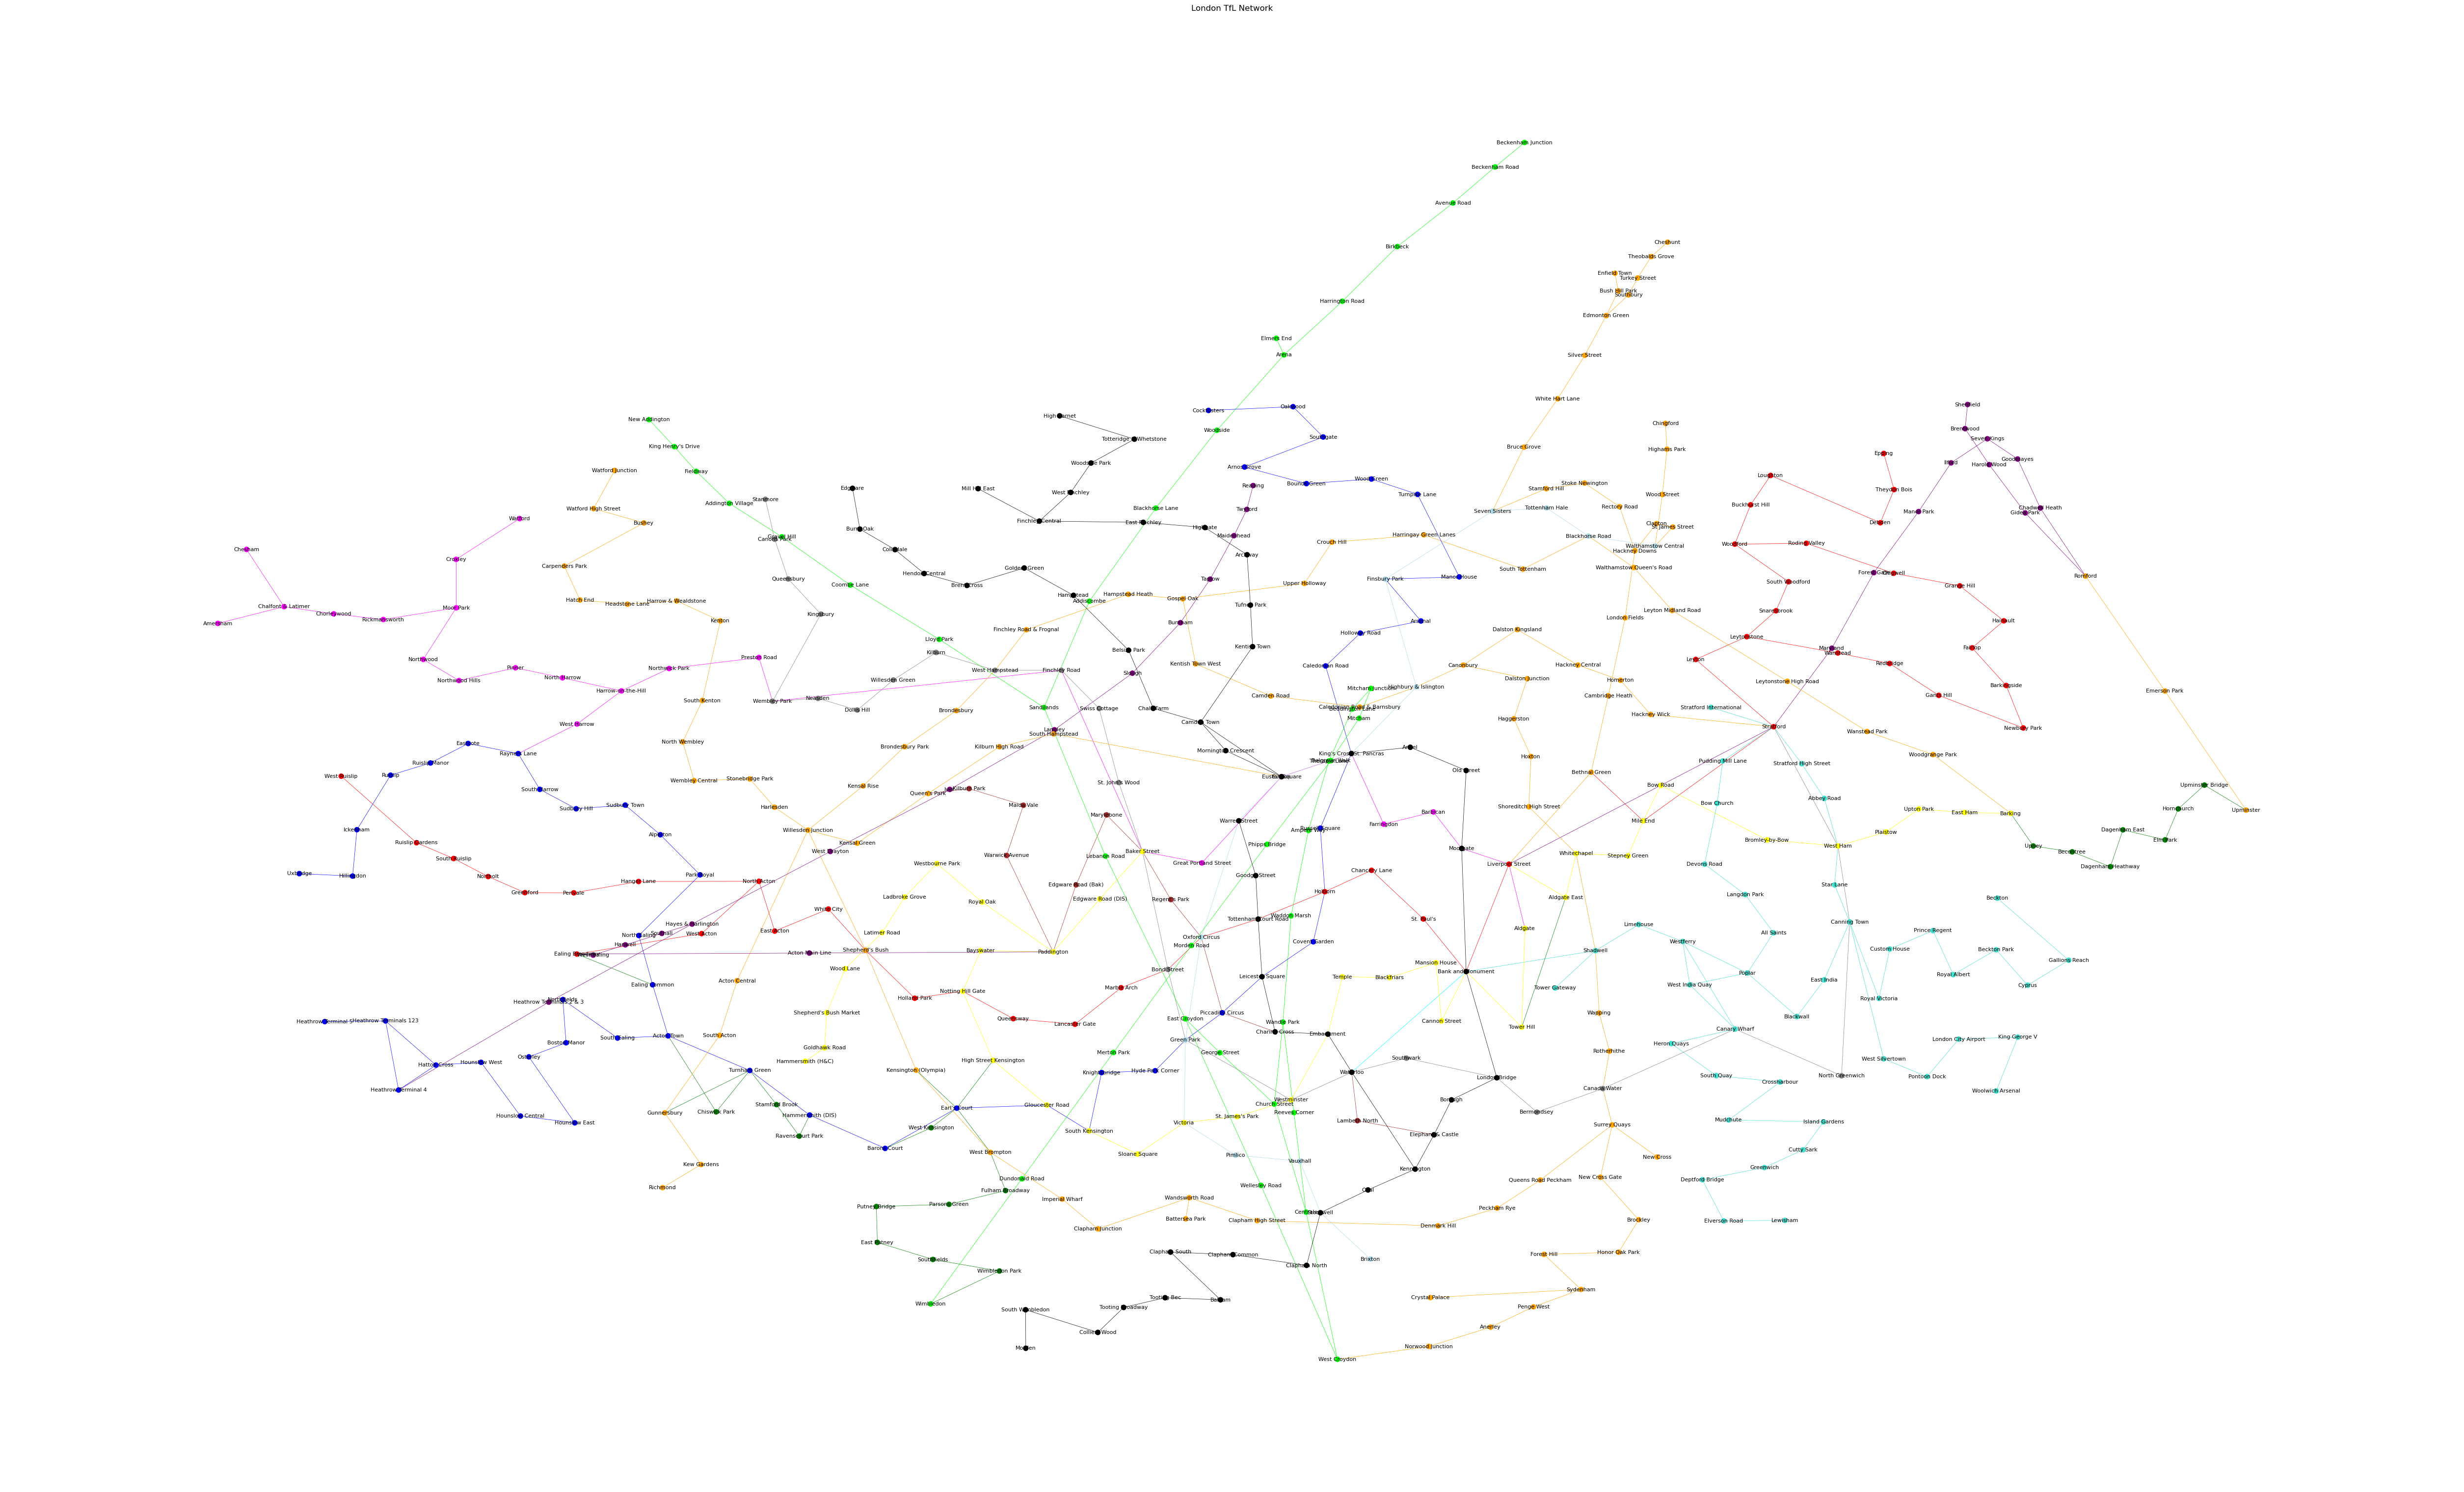

In [34]:
plt.figure(figsize=(50, 30))
nx.draw(G, pos, node_size=50, node_color=node_colors, with_labels=True, font_size=8, edge_color=edge_colors, width=0.5)
plt.title("London TfL Network")
plt.axis('off')
plt.show()